### Question 1

In [23]:
from numpy import empty, zeros, max
import timeit
import matplotlib.pyplot as plt

Temps= 6.586493800001335


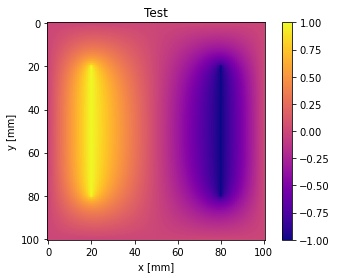

In [24]:
N1 = 20
N2 = 60
M = 100
V = 1
omega = 0.9
target = 1e-5

# On crée un array de dimension M+1 x M+1 (donc M carrés x M carrés)
phi = zeros([M+1, M+1], float)

# On initialise avec les conditions aux frontières, soit +/- V sur les plaques
phi[20:80,20] = V
phi[20:80,80] = -V

# On initialise l'array dphi, soit la différence de chaque point avec sa valeur précédente
dphi = zeros([M+1,M+1], float)

# Main loop
delta = 1

start = timeit.default_timer()
while delta > target:

    # Calculate new values of the potential
    for i in range(1,M):
        for j in range(1,M):

            # If the point is one of the walls or one of the plates, do not update the value.
            if i==0 or i==(M) or j==0 or j==(M):
                # Do not change the value
                phi[i,j] = 0
            
            # If the point is on the left plate:
            elif j==20 and i>=20 and i<=80:
                phi[i,j] = V

            # If the point is on the right plate:
            elif j==80 and i>=20 and i<=80:
                phi[i,j] = -V

            # Anywhere else; update the value
            else: 
                dphi[i,j] = (1+omega)*((phi[i+1,j]+phi[i-1,j]
                                        +phi[i,j+1]+phi[i,j-1])/4-phi[i,j])
                phi[i,j] += dphi[i,j]

    # Calculate maximum difference from old values

    delta = max(abs(dphi))

end = timeit.default_timer()

print("Temps=",end-start)

# Make a plot
plt.imshow(phi)
plt.title("Test")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.plasma()
plt.colorbar()
plt.show()

Temps= 38.423344399998314


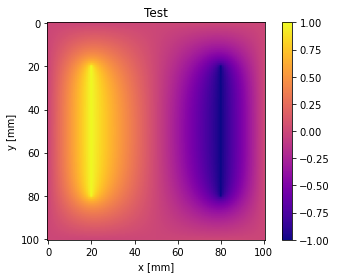

In [25]:
# Jacobi sans slicing

N1 = 20
N2 = 60
M = 100
V = 1
omega = 0.9
target = 1e-5

# On crée un array de dimension M+1 x M+1 (donc M carrés x M carrés)
phi = zeros([M+1, M+1], float)
phiprime = empty([M+1, M+1], float)

# On initialise avec les conditions aux frontières, soit +/- V sur les plaques
phi[20:80,20] = V
phi[20:80,80] = -V

# Main loop
delta = 1

start = timeit.default_timer()
while delta > target:

    # Calculate new values of the potential
    for i in range(1,M):
        for j in range(1,M):

            # If the point is one of the walls
            if i==0 or i==(M) or j==0 or j==(M):
                # Do not change the value
                phiprime[i,j] = 0
            
            # If the point is on the left plate:
            elif j==20 and i>=20 and i<=80:
                phiprime[i,j] = V

            # If the point is on the right plate:
            elif j==80 and i>=20 and i<=80:
                phiprime[i,j] = -V

            # Anywhere else; update the value
            else:
                phiprime[i,j] = (phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4

    # Calculate maximum difference from old values

    delta = max(abs(phiprime-phi))

    phi, phiprime = phiprime, phi

end = timeit.default_timer()

print("Temps=",end-start)

# Make a plot
plt.imshow(phi)
plt.title("Test")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.plasma()
plt.colorbar()
plt.show()

In [40]:
# Jacobi avec slicing

N1 = 20
N2 = 60
M = 100
V = 1
omega = 0.9
target = 1e-5

# On crée un array de dimension M+1 x M+1 (donc M carrés x M carrés)
phi = zeros([M+1, M+1], float)
phiprime = empty([M+1, M+1], float)

# On initialise avec les conditions aux frontières, soit +/- V sur les plaques
phi[20:80,20] = V
phi[20:80,80] = -V

# Main loop
delta = 1

start = timeit.default_timer()
while delta > target:

    phiprime[1:M,1:M] = (phi[2:M+1,1:M]+phi[0:M-1,1:M]+phi[1:M,2:M+1]+phi[1:M,0:M-1])/4

    # Replacer les conditions frontières

    phiprime[:,0] = 0
    phiprime[:,M] = 0
    phiprime[0,:] = 0
    phiprime[M,:] = 0
    phi[20:80,20] = V
    phi[20:80,80] = -V

    # Calculate maximum difference from old values

    delta = max(abs(phiprime-phi))

    phi, phiprime = phiprime, phi

end = timeit.default_timer()

print("Temps=",end-start)

# Make a plot
plt.imshow(phi)
plt.title("Test")
plt.xlabel("x [mm]")
plt.ylabel("y [mm]")
plt.plasma()
plt.colorbar()
plt.show()

KeyboardInterrupt: 